# Анализ рекламных источников игры "Космические братья"

Анализ рекламных источников в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и
пытаются преуспеть в нелёгком деле колонизации галактики. Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

**Задачи исследования**
* Проанализировать поведения игроков в зависимости от источника перехода.
* Провести исследовательский анализ данных;
* Проанализировать эффективность разных источников перехода
* Проверить статистические гипотезы

## Чтение и подготовка данных

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:
* Победа над первым врагом
* Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно

**Описание данных**

Файл `game_actions.csv`:
* `event_datetime` — время события;
* `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
    
    
* `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр
    
    
* `user_id` — идентификатор пользователя;
* `project_type` — тип реализованного проекта;

Файл `ad_costs.csv`:
* `day` - день, в который был совершен клик по объявлению
* `source` - источник трафика
* `cost` - стоимость кликов

Файл `user_source.csv`:
* `user_id` - идентификатор пользователя
* `source` - источников, с которого пришёл пользователь, установивший приложение

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

### game_actions

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')

In [3]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [4]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Пропуски есть только в building_type и project_type, это соответствует характеру данных (так как эти ячейки заполнены только при определенном типе события).

Приведем event_datetime к типу данных datetime

In [5]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

Выделим дату в отдельный столбец

In [6]:
game_actions['event_date'] = game_actions['event_datetime'].dt.date

In [7]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
 5   event_date      135640 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 6.2+ MB


### ad_costs

In [8]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [9]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [10]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [11]:
ad_costs['day'] = pd.to_datetime(ad_costs['day']).dt.date

Посмотрим какие бывают рекламные каналы

In [12]:
ad_costs['source'].unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

### user_source

In [13]:
user_source = pd.read_csv('/datasets/user_source.csv')

In [14]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [15]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


Здесь всё хорошо, пропусков нет, типы данных правильные

Посмотрим какие у нас бывают источники рекламы

In [16]:
user_source['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

## Исследовательский анализ данных

### Динамика активности по событиям 
Построим динамику активности по событиям и посмотрим как они распределены

In [17]:
print('Минимальная дата событий:', game_actions['event_date'].min())
print('Максимальная дата событий:', game_actions['event_date'].max())

Минимальная дата событий: 2020-05-04
Максимальная дата событий: 2020-06-05


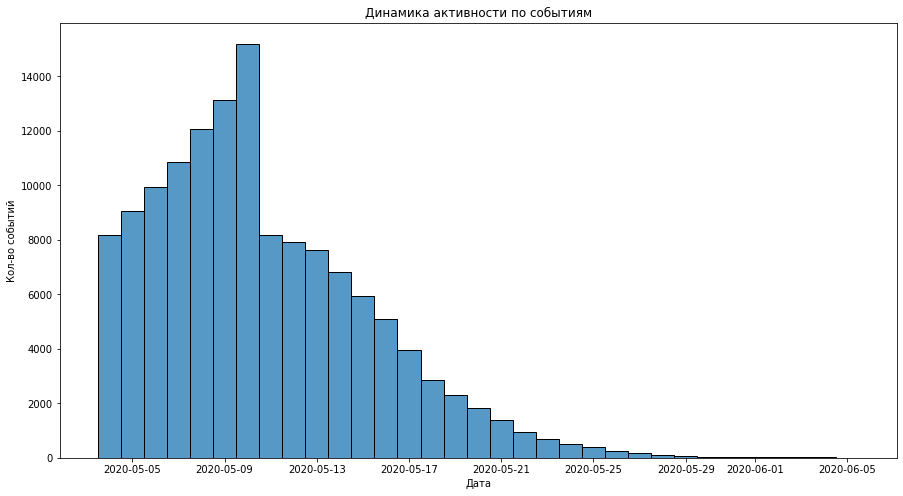

In [62]:
plt.figure(figsize=(15,8))
sns.histplot(data=game_actions, x='event_date')
plt.title('Динамика активности по событиям')
plt.xlabel('Дата')
plt.ylabel('Кол-во событий');

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно. Это видно и на графике, после 10го мая приток новых пользователей закончился и дальше количество событий плавно (после первого резкого скачка) пошло на спад. Аномалий нет

### Распределение по типам событий и типам зданий

Посмотрим на распредление по типам событий. Ожидаем, что построек зданий будет значительно больше остальных событий, так как проект и заерешение уровня у каждого игрока случаются только один раз

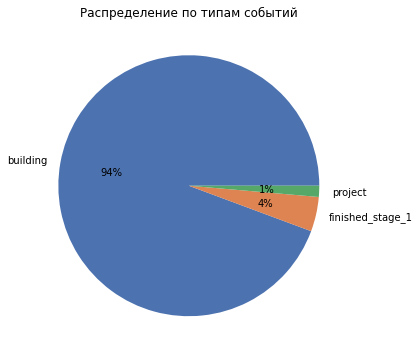

In [19]:
colors = sns.color_palette('deep')[0:3]
plt.figure(figsize=(6,6))
chart = plt.pie(x=game_actions.groupby(by='event')['event'].count(), 
                labels=game_actions['event'].unique(), colors=colors, autopct='%.0f%%')
text = plt.title('Распределение по типам событий')

График соответсвует ожиданиям, данные нормальные, это приятно =)
Причем количество сдавших проект меньше тех, кто перешел на второй уровень, что тоже логично и правильно.

Посмотрим теперь, какие здания при строительстве самые популярные

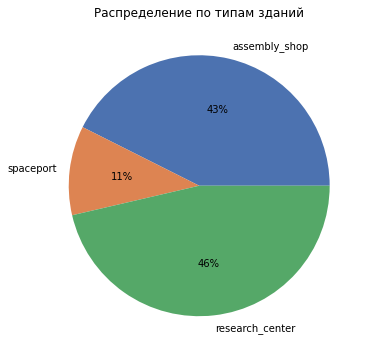

In [20]:
colors = sns.color_palette('deep')[0:3]
plt.figure(figsize=(6,6))
chart = plt.pie(x=game_actions.query('event == "building"').groupby(by='building_type')['event'].count(), 
                labels=game_actions.query('event == "building"')['building_type'].unique(), 
                colors=colors, autopct='%.0f%%')
text = plt.title('Распределение по типам зданий')

Получили, что самый популярный объект это исследовательский центр. С небольшим отставанием идет сборочный цех. И меньше всего игроки строят космопорт, видимо он не такой полезный) либо одного космопорта достаточно, в отличии от сборочного цеха и исслед.центра

### Профили пользователей

Для дальнейшего исследование соберем профили пользователей - идентификатор пользователя, дата начала игры, способ прохождения уровня, время прохождения уровня, количество построенных зданий, канал привлечения, стоимость привлечения

Сначала выделим **время начала игры и время последнего события** (это значит либо переход на след.уровень, либо прекращение игры)

In [21]:
profiles = (
    game_actions.sort_values(by='event_date')
    .groupby(by='user_id')
    .agg({
        'event_date': ['first', 'last']
    })
    .rename(columns={'first': 'game_start', 'last': 'game_stop'}, level=1)
    .droplevel(level=0, axis=1)
    .reset_index()
)

In [22]:
profiles.head()

,user_id,game_start,game_stop
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22


Теперь добавим **способ прохождения уровня**:
* если есть запись о заверешенном проекте, значит игрок прошел уровень через проект
* если нет записи о завершенном проекте, значит игрок прошел уровень через победу врага

Если у игрока нет события о прохождении уровня, значит он еще его не прошел (логично)

Сделаем отдельную булеву колонку о прохождении уровня *level_completed*, и отдельную булеву колонку о строительстве проекта *project_completed*. Таким образом, если уровень пройден и *project_completed=False*, значит игрок прошел уровень через победу врага

In [23]:
events = ['finished_stage_1', 'project']
for event in events:
    profiles[event] = profiles['user_id'].isin(
                game_actions.query('event == @event')['user_id'].unique()
            )

In [24]:
profiles.rename(columns={'finished_stage_1':'level_completed', 'project':'project_completed'}, inplace=True)
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False


Проверим, что всё правильно вышло: число пользователей завершивших уровень и построивших проект должно совпадать в профилях и в исходном датасете

In [25]:
print(game_actions.query('event == "finished_stage_1"')['user_id'].count())
print(profiles.query('level_completed == True')['user_id'].count())

print(game_actions.query('event == "project"')['user_id'].count())
print(profiles.query('project_completed == True')['user_id'].count())


5817
5817
1866
1866


Отлично, кажется всё вышло!

Посчитаем теперь **время прохождения уровня** (или просто время игры для тех, кто не прошел уровень)

In [27]:
profiles['time_for_level'] = (profiles['game_stop'] - profiles['game_start']).dt.days
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed,time_for_level
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False,9
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False,7
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False,17


Добавим **построенные здания**. Для этого посчитаем их отдельно и смерджим в профили

In [28]:
buildings = pd.pivot_table(game_actions.query('event == "building"'), 
                           index='user_id', columns='building_type', values='event', aggfunc='count').reset_index()

Заменим пустые значения NaN на нули и изменим типа данных на int

In [29]:
buildings[['assembly_shop', 'research_center', 'spaceport']] = buildings[['assembly_shop', 'research_center', 'spaceport']].fillna(0).astype(int)
buildings.head()

building_type,user_id,assembly_shop,research_center,spaceport
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,6,1,6
1,00151b4f-ba38-44a8-a650-d7cf130a0105,4,0,5
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2,0,2
3,001d39dc-366c-4021-9604-6a3b9ff01e25,4,0,4
4,002f508f-67b6-479f-814b-b05f00d4e995,3,1,8


Посчитаем еще одну колонку с общим числом зданий и добавим вё это в профили

In [30]:
buildings['buildings'] = buildings['assembly_shop'] + buildings['research_center'] + buildings['spaceport']

In [31]:
profiles = profiles.merge(buildings, on='user_id', how='left')

In [32]:
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False,14,6,1,6,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False,12,4,0,5,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False,9,2,0,2,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False,7,4,0,4,8
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False,17,3,1,8,12


Добавим **канал привлечения**

In [33]:
profiles = profiles.merge(user_source, on='user_id', how='left')

In [34]:
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False,14,6,1,6,13,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False,12,4,0,5,9,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False,9,2,0,2,4,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False,7,4,0,4,8,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False,17,3,1,8,12,facebook_ads


Теперь можем добавить затраты на рекламу из ad_cost и посчитать **стоимость привлечения каждого пользователя**

В таблице ad_cost лежат затраты на рекламу, которая привела пользователей на след.день. Границы дат с 3.05 по 9.05. Поэтому чтобы корректно слить таблицы, надо прибавить один день в затратах рекламы

In [35]:
print(ad_costs['day'].min())
print(ad_costs['day'].max())

2020-05-03
2020-05-09


In [36]:
ad_costs['user_day'] = ad_costs['day'] + pd.Timedelta(days=1)
ad_costs.head()

,source,day,cost,user_day
0,facebook_ads,2020-05-03,935.882786,2020-05-04
1,facebook_ads,2020-05-04,548.354480,2020-05-05
2,facebook_ads,2020-05-05,260.185754,2020-05-06
3,facebook_ads,2020-05-06,177.982200,2020-05-07
4,facebook_ads,2020-05-07,111.766796,2020-05-08


In [37]:
profiles = profiles.merge(ad_costs, left_on=['game_start', 'source'], right_on=['user_day', 'source'], how='left')

In [38]:
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings,source,day,cost,user_day
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False,14,6,1,6,13,facebook_ads,2020-05-05,260.185754,2020-05-06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False,12,4,0,5,9,yandex_direct,2020-05-05,308.232990,2020-05-06
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False,9,2,0,2,4,youtube_channel_reklama,2020-05-04,259.073224,2020-05-05
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False,7,4,0,4,8,instagram_new_adverts,2020-05-04,502.925451,2020-05-05
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False,17,3,1,8,12,facebook_ads,2020-05-04,548.354480,2020-05-05


Посчитаем количество уникальных пользователей для каждого дня

In [39]:
unique_users = (
    profiles.groupby(by=['game_start', 'source'])['user_id'].count()
    .reset_index()
    .rename(columns={'user_id': 'unique_users'})
)

In [40]:
unique_users.head()

,game_start,source,unique_users
0,2020-05-04,facebook_ads,1184
1,2020-05-04,instagram_new_adverts,1452
2,2020-05-04,yandex_direct,2078
3,2020-05-04,youtube_channel_reklama,1146
4,2020-05-05,facebook_ads,694


Теперь можем соединить уникальных пользователей с освновной таблицей профидлей и посчитать стоимость привлечения для каждого пользователя

In [41]:
profiles = profiles.merge(unique_users, on=['game_start', 'source'], how='left')

In [42]:
profiles['acquisition_cost'] = profiles['cost'] / profiles['unique_users']

In [43]:
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings,source,day,cost,user_day,unique_users,acquisition_cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False,14,6,1,6,13,facebook_ads,2020-05-05,260.185754,2020-05-06,345,0.754162
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False,12,4,0,5,9,yandex_direct,2020-05-05,308.232990,2020-05-06,664,0.464206
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False,9,2,0,2,4,youtube_channel_reklama,2020-05-04,259.073224,2020-05-05,663,0.390759
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False,7,4,0,4,8,instagram_new_adverts,2020-05-04,502.925451,2020-05-05,796,0.631816
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False,17,3,1,8,12,facebook_ads,2020-05-04,548.354480,2020-05-05,694,0.790136


Теперь удалим все лишние столбцы

In [44]:
profiles = profiles.drop(columns=['day', 'user_day', 'cost','unique_users'])

Получили готовые профили, ура

In [45]:
profiles.head()

,user_id,game_start,game_stop,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings,source,acquisition_cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,False,False,14,6,1,6,13,facebook_ads,0.754162
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,False,False,12,4,0,5,9,yandex_direct,0.464206
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,False,False,9,2,0,2,4,youtube_channel_reklama,0.390759
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,True,False,7,4,0,4,8,instagram_new_adverts,0.631816
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,False,False,17,3,1,8,12,facebook_ads,0.790136


In [46]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13576 entries, 0 to 13575
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            13576 non-null  object 
 1   game_start         13576 non-null  object 
 2   game_stop          13576 non-null  object 
 3   level_completed    13576 non-null  bool   
 4   project_completed  13576 non-null  bool   
 5   time_for_level     13576 non-null  int64  
 6   assembly_shop      13576 non-null  int64  
 7   research_center    13576 non-null  int64  
 8   spaceport          13576 non-null  int64  
 9   buildings          13576 non-null  int64  
 10  source             13576 non-null  object 
 11  acquisition_cost   13576 non-null  float64
dtypes: bool(2), float64(1), int64(5), object(4)
memory usage: 1.2+ MB


###  Распределение по способу прохождения уровня
Посмотрим, какой способ прохождение уровня самый популярный

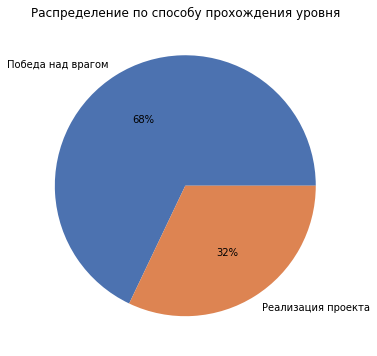

In [47]:
colors = sns.color_palette('deep')[0:2]
plt.figure(figsize=(6,6))
chart = plt.pie(x=profiles.query('level_completed == True').groupby(by='project_completed')['user_id'].count(), 
                labels=['Победа над врагом', 'Реализация проекта'], colors=colors, autopct='%.0f%%')
text = plt.title('Распределение по способу прохождения уровня')

Выяснили, что прохождение через победу более популярно примерно в два раза

## Анализ источников рекламы

Для анализа источников построим следующие графики:
* сколько пользователей приходило с каждого источника
* сколько тратилось на одного привлечение одного плоьзователя 
* затраты на рекламу

Для подсчета пользователей сгруппируем профили по дате и источнику

In [48]:
date_source_count_groupby = profiles.groupby(by=['game_start', 'source']).count().reset_index()
date_source_count_groupby.head()

,game_start,source,user_id,game_stop,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings,acquisition_cost
0,2020-05-04,facebook_ads,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
1,2020-05-04,instagram_new_adverts,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452
2,2020-05-04,yandex_direct,2078,2078,2078,2078,2078,2078,2078,2078,2078,2078
3,2020-05-04,youtube_channel_reklama,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
4,2020-05-05,facebook_ads,694,694,694,694,694,694,694,694,694,694


Для подсчета трат на одного плоьзователя применим такую же группировку, в качестве аггрегирующей функции можем взять медиану (так как внутри блока значения asquisition_cost будут у всех одинаковые, и медиана не изменит это значение)

In [49]:
date_source_median_groupby = profiles.groupby(by=['game_start', 'source']).median().reset_index()
date_source_median_groupby.head()

,game_start,source,level_completed,project_completed,time_for_level,assembly_shop,research_center,spaceport,buildings,acquisition_cost
0,2020-05-04,facebook_ads,False,False,11,5,1,4,11,0.790442
1,2020-05-04,instagram_new_adverts,False,False,11,5,1,4,11,0.649590
2,2020-05-04,yandex_direct,False,False,11,5,1,4,10,0.466381
3,2020-05-04,youtube_channel_reklama,False,False,11,5,1,4,10,0.396357
4,2020-05-05,facebook_ads,False,False,10,5,1,4,10,0.790136


Для графика затрат у нас уже всё есть в ad_costs

Построим эти графики вместе

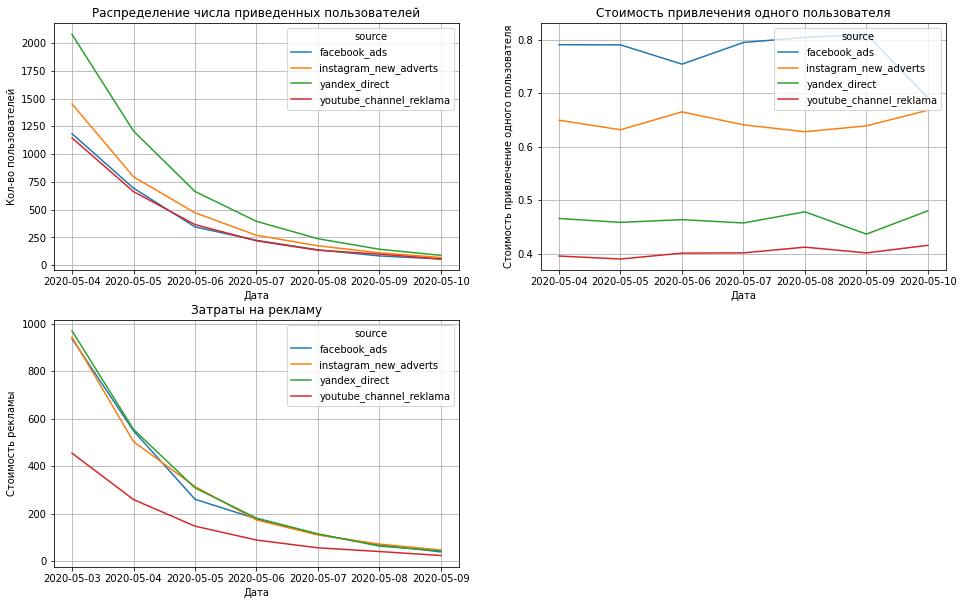

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes[-1, -1].axis('off') #скрываем последний график четырех, так как нам нужно только три

#График числа пользователей
sns.lineplot(data= date_source_count_groupby, x='game_start', y='user_id', hue='source', ax=axes[0,0])
axes[0,0].grid()
axes[0,0].set_title('Распределение числа приведенных пользователей')
axes[0,0].set_xlabel('Дата')
axes[0,0].set_ylabel('Кол-во пользователей')

#График стоимости привлечения одного пользователя
sns.lineplot(data= date_source_median_groupby, x='game_start', y='acquisition_cost', hue='source', ax=axes[0, 1])
axes[0, 1].grid()
axes[0, 1].set_title('Стоимость привлечения одного пользователя')
axes[0, 1].set_xlabel('Дата')
axes[0, 1].set_ylabel('Стоимость привлечение одного пользователя')

#График затрат на рекламу
sns.lineplot(data= ad_costs, x='day', y='cost', hue='source', ax=axes[1, 0])
axes[1, 0].grid()
axes[1, 0].set_title('Затраты на рекламу')
axes[1, 0].set_xlabel('Дата')
axes[1, 0].set_ylabel('Стоимость рекламы');

Получили, что:
* На рекламу в Facebook, Instagram, и Yandex тратилось одинаковое количество средств, однако Yandex привел больше всех новых пользователей
* У Facebook самая высокая стоимость привлечения одного пользователя, и пришло с него меньше всего пользователй
* На Youtube тратилось меньше всего средств, однако и стоимость привлечения оказалась самая низкая. Возможно это хороший канал для развития

Итого
* *Yandex* - самый эффективный канал (по стоимости одного пользователя и кол-ву приведенных пользователей)
* *Facebook* - самый неэффективный канал (по стоимости одного пользователя и кол-ву приведенных пользователей)
* *Youtube* - может быть хорошим каналом для развития
* *Instagram* - средний ок канал

## Влияние источника перехода на поведение пользователя

Проверим, вличет ли источник перехода на поведение пользователя по следующим параметрам:
* способ прохождение уровня
* количество и тип построенных зданий
* время прохождения уровня

### Способ прохождения уровня

In [51]:
level_pass = pd.pivot_table(profiles.query('level_completed == True'), 
                            index='source', columns='project_completed', values='user_id', aggfunc='count').reset_index()

In [52]:
level_pass = level_pass.rename(columns = {False: 'victory', True: 'project'})
level_pass

project_completed,source,victory,project
0,facebook_ads,759,391
1,instagram_new_adverts,990,476
2,yandex_direct,1422,620
3,youtube_channel_reklama,780,379


In [53]:
level_pass['ratio'] = round(level_pass['project'] / (level_pass['project'] + (level_pass['victory'])), 2)

In [54]:
level_pass 

project_completed,source,victory,project,ratio
0,facebook_ads,759,391,0.34
1,instagram_new_adverts,990,476,0.32
2,yandex_direct,1422,620,0.30
3,youtube_channel_reklama,780,379,0.33


Соотношение игроков закончивших уровень через проект ко всем игрокам (колонка *ratio*) примерно совпадает для всех источников.
Незначительные изменения можно списать на погрешность

### Количество и тип построенных зданий

Посчитаем среднее число и медиану количества строений на одного игрока. В корректного сравнения будем брать только тех, кто закончил первый уровень, чтобы был примерно одинаковый игровой опыт и этап

In [55]:
pd.pivot_table(profiles.query('level_completed == True'), 
               index='source', values=['buildings', 'assembly_shop', 'research_center', 'spaceport'],
               aggfunc=['median', 'mean']).reset_index()

source        median                                      \
                           assembly_shop buildings research_center spaceport   
0             facebook_ads             5        11               1         5   
1    instagram_new_adverts             4        11               1         5   
2            yandex_direct             5        11               1         5   
3  youtube_channel_reklama             5        11               1         5   

           mean                                       
  assembly_shop  buildings research_center spaceport  
0      4.426087  10.524348        1.333043  4.765217  
1      4.345157  10.489768        1.280355  4.864256  
2      4.365818  10.353085        1.252693  4.734574  
3      4.347714  10.495255        1.280414  4.867127

Видим что медиана практически одинакова у всех, и средние значения близки друг к другу

### Время прохождения уровня

In [56]:
pd.pivot_table(profiles.query('level_completed == True'), 
               index='source', values='time_for_level',
               aggfunc=['median', 'mean']).reset_index()

,source,median,mean
,,time_for_level,time_for_level
0,facebook_ads,12,11.794783
1,instagram_new_adverts,12,11.847885
2,yandex_direct,11,11.757101
3,youtube_channel_reklama,12,11.862813


Здесь так же не видно никаких зависимостей от источника перехода

### Вывод
Посмотрели на следующие харакетиристики в зависимости от разных рекламных источников перехода
* способ прохождение уровня
* количество и тип построенных зданий
* время прохождения уровня

Можем сделать вывод, что **источник перехода не влияет на игровое поведение пользователей**

## Статистические гипотезы
### Время завершения уровня различается в зависимости способа прохождения уровня
Проверим гипотезу о том, что время завершения уровня различается в зависимости способа прохождения уровня:

$H_0$ - время завершения уровня совпадает (не зависит от способа прохождения)
    
$H_1$ - время завершения уровня различается (зависит от способа прохождения)

Для это выделим два массива данных - время прохождения уровня для каждого из способов

In [57]:
time_project = profiles.query('level_completed == True and project_completed == True')['time_for_level']
time_victory = profiles.query('level_completed == True and project_completed == False')['time_for_level']

In [58]:
print(len(time_project))
print(len(time_victory))

1866
3951


In [59]:
p_value = stats.mannwhitneyu(list(time_project), list(time_victory))[1]
alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу, есть разница в среднем времени прохождения уровня")
else:
    print("Не можем отвергнуть нулевую гипотезу. Статистической разницы в среднем времени прохождения уровня")

print("p-value:", "{0:.3f}".format(p_value))

print("Среднее время прохождения уровня через проект", time_project.mean())
print("Среднее время прохождения уровня через победу", time_victory.mean())

Отвергаем нулевую гипотезу, есть разница в среднем времени прохождения уровня
p-value: 0.000
Среднее время прохождения уровня через проект 13.396570203644158
Среднее время прохождения уровня через победу 11.0584662110858


Получили что прохождение уровня через проект статистически занимает больше времени, чем через победу

Для наглядности посмотрим на распределение

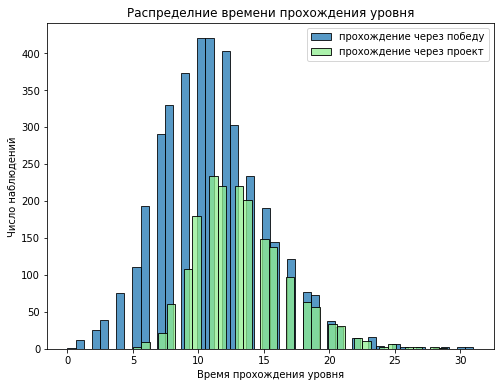

In [102]:
plt.figure(figsize=(8, 6))
vchart = sns.histplot(time_victory, label='прохождение через победу')
plt.xlabel('Время прохождения уровня')
plt.ylabel('Число наблюдений')
plt.title('Распределние времени прохождения уровня')
pchart = sns.histplot(time_project, color='lightgreen', label='прохождение через проект')
plt.legend()
plt.show()

### Количество построенных зданий различается в зависимости способа прохождения уровня
Проверим гипотезу о том, что количество построенных зданий различается в зависимости способа прохождения уровня:

$H_0$ - количество построенных зданий совпадает (не зависит от способа прохождения)
    
$H_1$ - количество построенных зданий различается (зависит от способа прохождения)

Для это выделим два массива данных - количество построенных зданий для каждого из способов

In [60]:
buildings_project = profiles.query('level_completed == True and project_completed == True')['buildings']
buildings_victory = profiles.query('level_completed == True and project_completed == False')['buildings']

In [61]:
p_value = stats.mannwhitneyu(list(buildings_project), list(buildings_victory))[1]
alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу, есть разница в количестве построенных зданий")
else:
    print("Не можем отвергнуть нулевую гипотезу. Статистической разницы в количестве построенных зданий")

print("p-value:", "{0:.3f}".format(p_value))

print("Среднее количество построенных зданий при прохождении уровня через проект", buildings_project.mean())
print("Среднее количество построенных зданий при прохождении уровня через победу", buildings_victory.mean())

Отвергаем нулевую гипотезу, есть разница в количестве построенных зданий
p-value: 0.000
Среднее количество построенных зданий при прохождении уровня через проект 12.64790996784566
Среднее количество построенных зданий при прохождении уровня через победу 9.411541381928625


Так же получили, что при прохождения уровня через проект игроки строят больше зданий (возможно они требуются для реализации проекта).

Посмотрим на распределение

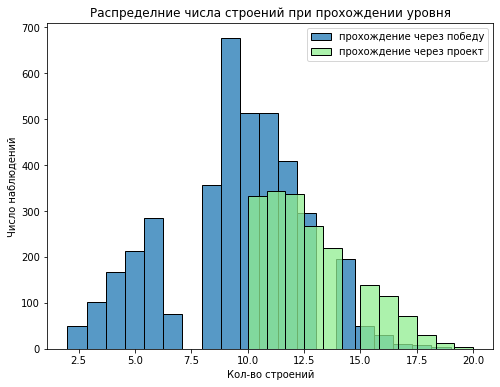

In [108]:
plt.figure(figsize=(8, 6))
vchart = sns.histplot(buildings_victory, label='прохождение через победу', bins=20)
plt.xlabel('Кол-во строений')
plt.ylabel('Число наблюдений')
plt.title('Распределние числа строений при прохождении уровня')
pchart = sns.histplot(buildings_project, color='lightgreen', label='прохождение через проект', bins=12)
plt.legend()
plt.show()

График подтверждает результат, но выглядит необычно - нет левой части купола для проходивших через проект. Скорее всего действительно для реализации проекта требуется как минимум 9 зданий

## Выводы
По результатам исследования, пришли к следующим выводам

1. *Исследовательский анализ данных*
* Примерно две трети пользователей предпочитают проходить первый уровень через победу (68% против 32%)
* Самые частостроящиеся здания это исследовательский центр(46% из всех строений) и сборочный цех (42% из всех строений).

2. *Анализ рекламных источников*

* *Yandex* - самый эффективный канал (по стоимости одного пользователя и кол-ву приведенных пользователей)
* *Facebook* - самый неэффективный канал (по стоимости одного пользователя и кол-ву приведенных пользователей)
* *Youtube* - может быть хорошим каналом для развития
* *Instagram* - средний ок канал
    
3. *Влияние рекламного истоника на поведение пользователя*
* Рекламный источник не влияет на поведение пользователя
    
    
4. *Статистические гипотезы*
* Прохождение уровня через проект статистически занимает больше времени, чем через победу (в среднем 13,5 дней и 11 дней)
* При прохождения уровня через проект игроки строят больше зданий (в среднем 12,6 зданий и 9,4)